In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def evaluation(img1, img2):
    I = int(np.sum(img1 & img2))
    U = int(np.sum(img1 | img2))
    IOU = round((I / U), 4)
    DICE = round((2 * I / (np.sum(img1) + np.sum(img2))),4)
    return(IOU, DICE)

In [14]:
img  = cv2.imread('1.jpg')
# Normalize
img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)

In [15]:
S = img.shape[0] * img.shape[1]
temp = S/4
window = int(temp) if int(temp) % 2 != 0 else int(temp+1)
window

12561

In [16]:
# Convert it into binary image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_G = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY, window, 2)

img_M = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, window, 2)

ret, img_B = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

In [17]:
# Detect the edge of manhole cover
(mu, sigma) = cv2.meanStdDev(img_gray)
edge_A = cv2.Canny(img_gray, mu - sigma, mu + sigma)
edge_G = cv2.Canny(img_G, 0, 255)
edge_M = cv2.Canny(img_M, 0, 255)
edge_B = cv2.Canny(img_B, 0, 255)

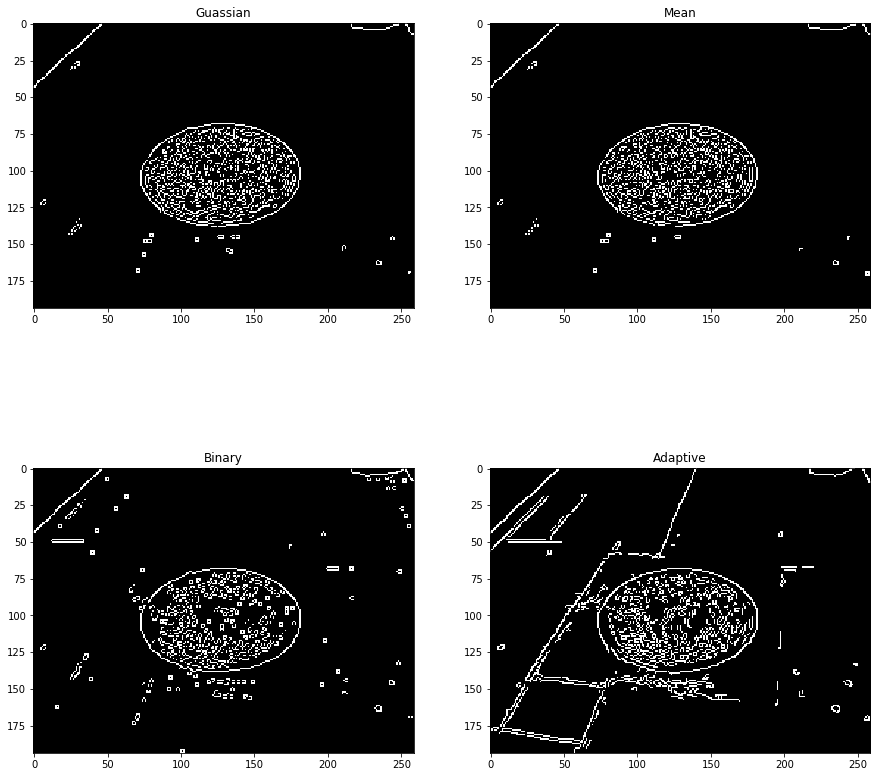

In [18]:
titles = ['Guassian','Mean','Binary','Adaptive']
imgs =[edge_G, edge_M, edge_B, edge_A]

fig = plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(imgs[i],'gray')
    plt.title(titles[i])

plt.show()

In [27]:
(IOU_G, DICE_G) = evaluation(edge_G, edge_B)
(IOU_M, DICE_M) = evaluation(edge_M, edge_B)
(IOU_A, DICE_A) = evaluation(edge_A, edge_B)
print('The IoU and Dice Coefficient for Gaussian Method is:', IOU_G, 'and', DICE_G)
print('The IoU and Dice Coefficient for Mean Method is:', IOU_M, 'and', DICE_M)
print('The IoU and Dice Coefficient for Adaptive Method is:', IOU_A, 'and', DICE_A)

The IoU and Dice Coefficient for Gaussian Method is: 0.3646 and 0.5344
The IoU and Dice Coefficient for Mean Method is: 0.3855 and 0.5565
The IoU and Dice Coefficient for Adaptive Method is: 0.3007 and 0.4624
